Try this notebook on Binder:
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/echoi/compgeodyn/master?labpath=ApproximatingFunctionDerivatives.ipynb)

# Approximating Function Derivatives

We cover some topics from Ch. 10 of Quarteroni (2000).

General idea: We want to compute $f'(x)$ of $f(x)$ on $[a,b]$.

- Define nodes: $[x_{0},\cdots,x_{n}]$ such that $x_{0}=a$ and $x_{n}=b$ and $x_{k+1} = x_{k}+h$ ($k=0,\cdots,n-1$) and $h=(b-a)/n$.
- Then, we approximate $f'(x)$ using the nodal values $\{f(x_{k})\}$ as
\begin{equation}
   h\sum_{k=-m}^{m} \alpha_{k}u_{i-k} = \sum_{k=-m'}^{m'}\beta_{k}f(x_{i-k}),
\end{equation}
where $\{\alpha_{k}\}$, $\{\beta_{k}\} \in \mathbb{R}$ are coefficients to be determined and $u_{k}$ is the desired approximation to $f'(x_{k})$.
- The set of nodes involved in constructing $f'(x)$ at a certain node is call **stencil**.
    - The band of the matrix associated with the above system increases as the stencil gets larger.

## Classical finite difference

Key feature of finite difference is that a derivative is directly approximated with an **algebraic expression of known function values** at the nodes.

\begin{equation}
  f'(x_{i}) := \lim_{h\rightarrow 0+}\frac{f(x_{i}+h)-f(x_{i})}{h}
\end{equation}

\begin{equation}
  u_{i}^{\text{FD}} = \frac{f(x_{i+1})-f(x_{i})}{h},\ 0 \le i \le n-1.
\end{equation}

\begin{equation}
    \Longleftrightarrow
  \begin{matrix}
   m=0\ \alpha_{0}=1 \\
   m'=1 \\
   \{\beta_{-1}, \beta_{0}, \beta_{1}\} = \{1,-1,0\}
  \end{matrix}
\end{equation}

\begin{align}
f(x_{i+1}) &= f(x_{i}+h) = f(x_{i}) + h f'(x_{i}) + \frac{h^{2}}{2!}f''(x_{i}) + \frac{h^{3}}{3!}f'''(x_{i}) + \cdots \quad (1)\\
f'_{i} &= \underbrace{\frac{f_{i+1}-f_{i}}{h}}_{\equiv u_{i}^{\text{FD}}} - \frac{h}{2!}f''(x_{i}) - \frac{h^{2}}{3!}f'''(x_{i}) + \cdots \\
\therefore f'_{i}-u_{i}^{\text{FD}} &= - \frac{h}{2!}f''(x_{i}) - \frac{h^{2}}{3!}f'''(x_{i}) + \cdots = O(h),
\end{align}
where the superscript 'FD' denotes **forward difference**.

Similarly,
\begin{align}
f(x_{i-1}) &= f(x_{i}-h) = f(x_{i}) - h f'(x_{i}) + \frac{h^{2}}{2!}f''(x_{i}) - \frac{h^{3}}{3!}f'''(x_{i}) + \cdots \quad (2) \\
f'_{i} &= \underbrace{\frac{f_{i}-f_{i-1}}{h}}_{\equiv u_{i}^{\text{BD}}} + \frac{h}{2!}f''(x_{i}) - \frac{h^{2}}{3!}f'''(x_{i}) + \cdots \\
\therefore f'_{i}-u_{i}^{\text{BD}} &= \frac{h}{2!}f''(x_{i}) - \frac{h^{2}}{3!}f'''(x_{i}) + \cdots = O(h),
\end{align}
where the superscript 'BD' denotes **backward difference**.

(1)$-$(2) $\rightarrow$
\begin{align}
f_{i+1} - f_{i-1} &= 2 h f'(x_{i}) + \frac{h^{3}}{3}f'''(x_{i}) + \cdots \quad (2) \\
f'_{i} &= \underbrace{\frac{f_{i+1}-f_{i-1}}{2h}}_{\equiv u_{i}^{\text{CD}}} - \frac{h^{2}}{6}f'''(\xi) + \cdots \quad (\xi \in [x_{i-1},x_{i+1}]) \\
       &= u_{i}^{\text{CD}} + O(h^{2}),
\end{align}
where the superscript 'CD' denotes **central difference**.

<img src="./Figures/Quarteroni_Fig10.4.PNG" width="800">

- Second order derivative: (1)$+$(2) $\rightarrow$
\begin{equation}
f_{i+1} -2f_{i} + f_{i-1} = h^{2}f''(x_{i}) + O(h^{4})
\end{equation}

\begin{equation}
\therefore u''_{i} = \frac{f_{i+1}-2f_{i} + f_{i-1}}{h^{2}} + O(h^{2}).
\end{equation}

## Generalized Fourier Series

- An alternative to FD is to take derivative of interpolating polynomials.
- Recall Lagrange interpolation, for instance.
    - Lagrange polynomial has known instability w.r.t. equally space nodes and high degree.
    - Of course, it is carried over to the derivatives.
- Piecewise interpolation is a solution we learned
    - Equally spaced nodes but the degree kept low
    - This is the basis for the family of **finite element method**.
- In contrast, we can turn to **non-uniformly distributed nodes** releasing the restiriction on the polynomial degree.
    - This is the basis for **spectral element method**.

### Some pre-requisites for generalized Fourier series
Let $w = w(x)$ be a *weight function* on the interval $(-1,1)$.

$\{ p_{k},\ k=0,1,\ldots \}$: A system of algebraic polynomials, with $p_{k}$ of degree equal to $k$ and **mutually orthogonal** on the interval $(-1,1)$ w.r.t. $w$: i.e., 
\begin{equation}
\int_{-1}^{1}p_{k}(x)p_{m}(x)w(x)dx = 0 \text{ if } k\neq m.
\end{equation}

- Scalar product of functions:
\begin{equation}
 (f,g)_{w} = \int_{-1}^{1} f(x)g(x)w(x) dx
\end{equation}
- Norm of a function:
\begin{equation}
 \Vert f \Vert_{w} = \sqrt{(f,f)_{w}} = (f,f)_{w}^{1/2}
\end{equation}


Let's define the following function space:
\begin{equation}
L^{2}_{w} = L^{2}_{w}(-1,1) = \left\{f:(-1,1) \rightarrow \mathbb{R} \vert \int_{-1}^{1} f^{2}(x)w(x)dx < \infty \right\}.
\end{equation}

**Definition**: $^\forall f \in L^{2}_{w}$,
\begin{equation}
  Sf = \sum_{k=0}^{+\infty} \hat{f}_{k}\,p_{k} \text{ with } \hat{f}_{k}=\frac{(f,p_{k})_{w}}{\Vert p_{k} \Vert_{w}}
\end{equation}
is called **the generalized Fourier series** of $f$ and $\hat{f}_{k}$ is the $k$-th Fourier coefficient.


Let's denote the series truncated at $k=n$ as $f_{n}$:
\begin{equation}
 f_{n}(x) = \sum_{k=0}^{n} \hat{f}_{k}p_{k}(x).
\end{equation}
Then, we get the following result:
\begin{equation}
 \lim_{n\rightarrow +\infty} \left\lVert f - f_{n} \right\rVert = 0.
\end{equation}


Thanks to the orthogonality of $p_{k}$'s, 
\begin{equation}
\begin{split}
  \left\lVert f \right\rVert^{2}_{w} &= (f,f)_{w} = \int_{-1}^{1} f(x) f(x) w(x) dx \\
         &= \sum_{k=0}^{+\infty} \hat{f}_{k}^{2} \left\lVert p_{k} \right\rVert^{2}_{w},
\end{split}
\end{equation}
and for any $n$,
\begin{equation}
 \Vert f - f_{n} \Vert_{w}^{2} = \sum_{k=n+1}^{+\infty} \hat{f}_{k}^{2} \left\lVert p_{k} \right\rVert^{2}_{w}.
\end{equation}

For any family of monic (i.e., univariate polynomial with leading coefficient of +1) orthogonal polynomials $\{ p_{k} \}$, the following 3-term recursive formula holds:
\begin{equation}
\begin{split}
 &p_{k+1}(x) = (x-\alpha_{k})p_{k}(x) - \beta_{k} p_{k-1}(x), \ k \ge 0 \\
 &p_{-1}(x) = 0,\ p_{0}(x) = 1,
\end{split}
\end{equation}
where
\begin{equation}
 \alpha_{k} = \frac{(xp_{k},p_{k})_{w}}{(p_{k},p_{k})_{w}},\ \beta_{k+1} = \frac{(p_{k+1},p_{k+1})_{w}}{(p_{k},p_{k})_{w}},\ k \ge 0.
\end{equation}
$\beta_{0}$ is arbitrary.

### Example 1: Chebyshev polynomials
With the weighting function
\begin{equation}
 w(x) = \frac{1}{\sqrt{1-x^{2}}} \text{ on } (-1,1),
\end{equation}
the function space we will be working on becomes
\begin{equation}
 L_{w}^{2}(-1,1) = \left\{ f:(-1,1)\rightarrow \mathbb{R} \vert \int_{-1}^{1} f^{2}(x)(1-x^{2})^{-1/2} dx < \infty \right\}
\end{equation}


The Chebyshev polynomials are defined as follows:
\begin{equation}
 T_{k}(x) = \cos k\theta,\ \theta = \arccos x,\ k=0,1,2,\cdots.
\end{equation}

The recursive formula are

\begin{split}
 &T_{k+1}(x) = 2xT_{k}(x) - T_{k-1}(x),\ k=1,2,\cdots \\
 &T_{0}(x) = 1, T_{1}(x) = x.
\end{split}


#### Examples

\begin{split}
T_{2} &= 2xT_{1}(x) - T_{0}(x) = 2x^{2}-1 \\
(\text{cf. } T_{2} &= \cos 2\theta = 2\cos^{2}\theta -1 = 2x^{2}-1) \\
T_{3} &= 2xT_{2}(x) - T_{1}(x) = 2x(2x^{2}-1)-x = 4x^{3}-3x \\
T_{4} &= 2xT_{3}(x) - T_{2}(x) = 2x(4x^{3}-3x)-2x^{2}+1 = 8x^{4}-8x^{2}+1 \\
&\vdots
\end{split}


101


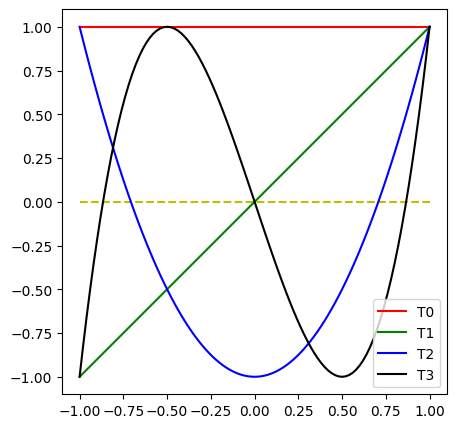

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1,101)
print(x.size)

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(x, np.zeros(x.size),'y--')
ax.plot(x, np.ones(x.size),'r-', label='T0')
ax.plot(x, x, 'g-', label='T1')
ax.plot(x,2.0*x**2-1.0,'b-', label='T2')
ax.plot(x,4.0*x**3-3.0*x, 'k-', label='T3')
ax.legend()
ax.set_aspect('equal')

Let's verify the orthogonality of Chebyshev polynomials.
1. $(T_{k},T_{n})_{w}=0$ if $k\neq n$
\begin{equation}
 \int_{-1}^{1} \cos k\theta \cos n\theta \frac{1}{\sqrt{1-x^{2}}} dx = 
 \int_{\pi}^{2\pi} \cos k\theta \cos n\theta \, d\theta,
\end{equation}
where we used $\cos \theta = x \Rightarrow -\sin \theta\,d\theta = dx \Rightarrow d\theta = \frac{-1}{\sqrt{1-\cos^{2}\theta}}dx = \frac{-1}{\sqrt{1-x^{2}}} dx$.
Further using $\cos A\cos B = \frac{1}{2}\left(\cos(A-B) + \cos(A+B)\right)$, we can show that the above integral is zero.
2. $(T_{n},T_{n})_{w}$ is $C_{0} = \pi$ if $n=0$; $C_{n} = \pi/2$ if $n \neq 0$.

Finally, Chebyshev series of a function $f \in L^{2}_{w}$ is
\begin{equation}
 Cf = \sum_{k=0}^{\infty} \hat{f}_{k} T_{k},\ \hat{f}_{k} = \frac{1}{C_{k}}\int_{-1}^{1}f(x)T_{k}(x)\frac{1}{\sqrt{1-x^{2}}}dx.
\end{equation}

What about $f'$? It is equal to $Cf' = \sum_{k=0}^{\infty} \hat{f}_{k} T'_{k}$ and deriavtives of a polynomial are easy to get.

#### Example
Let's try to approximate the function, $f(x) = \sqrt{1-x^{2}}$ with Chebyshev polynomials.
The first derivative is $f'(x) = -x/\sqrt{1-x^{2}}$.
\begin{equation}
\begin{split}
Cf(x) &= \hat{t}_{0}T_{0} + \hat{t}_{1}T_{1} + \hat{t}_{2}T_{2} + \cdots, \\
(Cf)'(x) &= \hat{t}_{0}T'_{0} + \hat{t}_{1}T'_{1} + \hat{t}_{2}T'_{2} + \cdots = \hat{t}_{1} + \hat{t}_{2}(4x) + \cdots, \\
\end{split}
\end{equation}
where
\begin{equation}
\hat{t}_{0} = \frac{\int_{-1}^{1}f(x)T_{0}w\,dx}{\int_{-1}^{1}T_{0}T_{0}w\,dx} = \frac{2}{\int_{-1}^{1}\frac{1}{\sqrt{1-x^{2}}}\,dx} = \frac{2}{\pi},
\end{equation}

\begin{equation}
\hat{t}_{1} = \frac{\int_{-1}^{1}f(x)T_{1}w\,dx}{\int_{-1}^{1}T_{1}T_{1}w\,dx} = 0,
\end{equation}

and
\begin{equation}
\hat{t}_{2} = \frac{\int_{-1}^{1}f(x)T_{2}w\,dx}{\int_{-1}^{1}T_{2}T_{2}w\,dx} = \frac{\int_{-1}^{1} (2x^{2}-1)dx}{\int_{-1}^{1}(2x^{2}-1)^{2}\frac{1}{\sqrt{1-x^{2}}}\,dx} = -\frac{4}{3\pi}.
\end{equation}


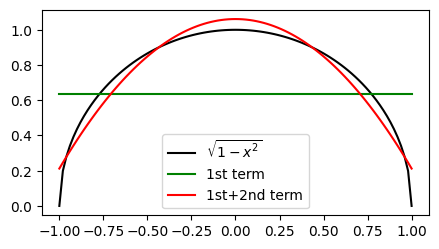

In [2]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.plot(x, np.sqrt(1-x**2), 'k-', label=r'$\sqrt{1-x^2}$')
ax.plot(x, 2.0/np.pi*np.ones(x.size), 'g-', label='1st term')
ax.plot(x, 2.0/np.pi - 4.0/(3.0*np.pi)*(2.0*x**2-1.0), 'r-', label='1st+2nd term')
ax.legend()
ax.set_aspect('equal')

In [4]:
def fprime(x):
    return -x/np.sqrt(1-x**2)

def Cfprime(x):
    return -16/(3.0*np.pi)*x

xvalues = np.array([-0.5,0.0,0.5])
for xval in xvalues:
    print("Exact and approximate values at x={0:e}: {1:e} {2:e}".format(xval, fprime(xval), Cfprime(xval)) )

Exact and approximate values at x=-5.000000e-01: 5.773503e-01 8.488264e-01
Exact and approximate values at x=0.000000e+00: -0.000000e+00 -0.000000e+00
Exact and approximate values at x=5.000000e-01: -5.773503e-01 -8.488264e-01


### Example 2: Legendre polynomials

With the weighting function
\begin{equation}
 w(x) = 1
\end{equation}
the function space we will be working on becomes
\begin{equation}
 L_{w}^{2}(-1,1) = \left\{ f:(-1,1)\rightarrow \mathbb{R} \vert \int_{-1}^{1} f^{2}(x)dx < \infty \right\}
\end{equation}

\begin{equation}
(f,g) = \int_{-1}^{1} f(x)g(x)dx, \Vert f \Vert = (f,f)^{1/2} = \left( \int_{-1}^{1} f^{2}(x) dx \right)^{1/2}
\end{equation}

The Legendre polynomials are defined as follows:

\begin{equation}
 L_{k}(x) = \frac{1}{2^{k}}\sum_{l=0}^{[k/2]}(-1)^{l}
 \begin{pmatrix}
 k\\
 l
 \end{pmatrix}
  \begin{pmatrix}
 2k-2l\\
 k
 \end{pmatrix}
 x^{k-2l}, \quad k=0,1,\cdots
\end{equation}
where $[k/2]$ is the integral part of $k/2$ and 

\begin{equation}
\begin{pmatrix}
k \\
l
\end{pmatrix}
= \frac{k!}{l!(k-l)!}.
\end{equation}

The recursive formula are

\begin{split}
 &L_{k+1}(x) = \frac{2k+1}{k+1}xL_{k}(x) - \frac{k}{k+1}L_{k-1}(x),\ k=1,2,\cdots \\
 &L_{0}(x) = 1, L_{1}(x) = x.
\end{split}

#### Examples

\begin{split}
L_{2} &= \frac{3}{2}x^{2} - \frac{1}{2} \\
L_{3} &= \frac{5}{2}x^{3} - \frac{3}{2}x \\
&\vdots
\end{split}


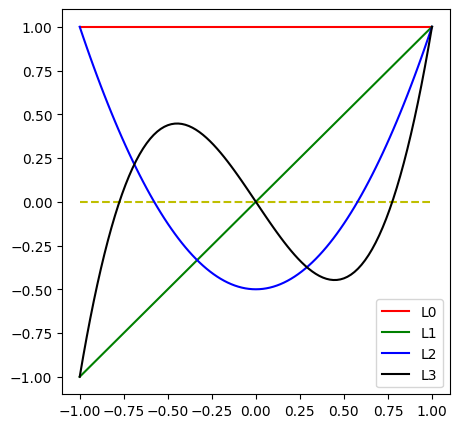

In [5]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x, np.zeros(x.size),'y--')
ax.plot(x, np.ones(x.size), 'r-', label='L0')
ax.plot(x, x, 'g-', label='L1')
ax.plot(x,1.5*x**2-0.5, 'b-', label='L2')
ax.plot(x,2.5*x**3-1.5*x, 'k-', label='L3')
ax.legend()


- Orthogonality: $(L_{k},L_{m}) = \delta_{km}\left(k+\frac{1}{2}\right)^{-1}$, $k, m=0,1,2,\cdots$.
- Legendre series of $f \in L_{2}$:
\begin{equation}
 Lf = \sum_{k=0}^{\infty} \hat{f}_{k}L_{k} \text{ with } \hat{f}_{k} = \left( k+\frac{1}{2} \right)\int_{-1}^{1} f(x)L_{k}(x) dx.
\end{equation}
- $(Lf)' = \sum_{k=0}^{\infty} \hat{f}_{k}L'_{k}$.

- So far so good: If a function can be represented by a generalized Fourier series, the differentiation of the function is given as a sum of derivatives of polynomials.

- However, our assumption was that $f(x)$ is known only at nodes $x_{k}$'s.

- Therefore, numerical integration is needed in evaluating the integral for the coefficients.

## Some facts about $L_{2}$

### Lebesgue integral
 - $L$ in $L_{2}$ is after the French mathematicial Henri Lebesgue.
 - Basic concept (https://en.wikipedia.org/wiki/Lebesgue_integration)
![Riemann vs Lebesgue](./Figures/570px-Riemann_vs_lebesgue_integration_of_serbian_covid_case_data.svg.png)
 - To truly appreciate the generality of the Lebesgue integral, one has to understand the **measure of a set**.
     - An interval on $\mathbb{R}$ or the product of intervals on $\mathbb{R}^{n}$ are examples of a set.
     - Lebesgue integral clearly defines the integral of some tricky functions like
 \begin{equation*}
f(x) = \begin{cases}
0 &\text{if $x$ is a rational number,}\\
1 &\text{if $x$ is an irrational number.}
\end{cases}
\end{equation*}
        - The answer is zero because of the measure of a set with a single real number is 0 and their sum is also 0.
        - The Riemann integration of this function is simply not defined.
 - Lebesgue was considered as a "crackpot" while working on the measure and integration theory (p. 626, Strichartz, *The Way of Analysis*, 2000, Jones and Bartlett Publihers, Inc.)
     - Riemann integration seemed powerful enough for all the possible applications back then.
 - When asked why he bothered to study the problem of defining the area of very irregular surfaces, he "replied by producing a crumpled handkerchief" (*idid*, p. 626).

### Some functions not in $L_{2}$

$$f(x) = \frac{1}{x^{p}} $$ are $L_{2}$ functions for $ p < 1/2 $ ; not for $p \ge 1/2$. 

For instance, 
$$ \int_{0}^{1} \left( \frac{1}{x^{1/2}} \right)^{2} dx = \int_{0}^{1} \frac{1}{x} dx = (\log x)\rvert_{0}^{1},$$ which is unbounded.

$$ \int_{0}^{1} \left( \frac{1}{x^{1/3}} \right)^{2} dx = \int_{0}^{1} \frac{1}{x^{2/3}} dx = 3x^{1/3}\rvert_{0}^{1} = 3.$$